***Troop Analysis*** <br>
Authors: Aurelien Giuglaris Michael, Laurent Bijman, Antoine Dorard

We give our permission and are glad to show our work, analysis and video to our peers or any other external party or individual !

## Load Troop Data <br>
Load troop data and do some first cleaning. Special, seasonal troops and troops unlocked at townhall higher than 9 are dropped.

In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Load the json file using pandas
def get_troop_data(path):
    df = pd.read_json(path)
    return df.drop(df.columns[0], axis=1)


cwd = os.getcwd()
print(cwd)
df = get_troop_data('troopUpgradeStats.json')
# Want to keep troups only from our main home
df = df[df['village'] == 'home']
# Only troops that are available all the time
df = df[df['seasonal'] == False]
# remove the spells
df = df[df['category'] == 'troop']
# remove the siege troup
df = df[df['subCategory'] == 'troop']
# Filter the troups above our TH level

index=0
df = df.reset_index()

for i in df['unlock']:
    if i.get('hall')>9: # Drop the troup if it is unlocked after TH9
        df = df.drop(index)
    index += 1
df = df.reset_index()
df.drop('level_0', axis=1, inplace=True)

# Find the index of the row where the name is equal to "Super Barbarian" remove super troops
index_to_keep = df[df['name'] == 'Super Barbarian'].index[0]
df= df.iloc[:index_to_keep] # Keep only the rows before the super troops
# Add the heros to the dataframe

# Add the heros to the dataframe
df_heros = get_troop_data('troopUpgradeStats.json')
df_heros = df_heros[df_heros['category'] == 'hero']
df_heros = df_heros.head(2)
df = pd.concat([df,df_heros])
df = df.reset_index()
df.drop('level_0', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)

# Dataset is missing the hitpoints for the troops and heros, we are adding them manually from scraped data
# Hitpoints for the troops
hitpoints_list = []
for row in df.iterrows():
    try:
        current_df = pd.read_csv((row[1]['name']+'.csv').replace(' ','_'))
        hp_list = current_df['Hitpoints'].tolist()
        hitpoints_list.append(hp_list)
    except:
        print('No hitpoints for', row[1]['name'])
        hitpoints_list.append([])
        continue

df['hitpoints'] = hitpoints_list

# Troop Speed
speed_df = pd.read_csv('TroopSpeed.csv')
df = pd.concat([df, speed_df["speed"]], axis=1)

df.head(20)


c:\Users\aured\Desktop\Learning Material\Bsc - DSAI UM\Year 3\Semester 2 Period 4\Data Analysis\Data Madness\Code\Clash_of_Clans_Data_Analysis\Troop Analysis


,name,housingSpace,village,category,subCategory,unlock,trainingTime,regenerationTimes,dps,upgrade,minLevel,seasonal,levels,resourceType,hitpoints,speed
0,Barbarian,1,home,troop,troop,"{'hall': 1, 'cost': 100, 'time': 10, 'resource...",5,[],"[8, 11, 14, 18, 23, 26, 30, 34, 38, 42, 45, 48]","{'cost': [20000, 60000, 200000, 650000, 140000...",1,False,"[1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11...",NaN,"[45, 54, 65, 85, 105, 125, 160, 205, 230, 250,...",16
1,Archer,1,home,troop,troop,"{'hall': 2, 'cost': 500, 'time': 60, 'resource...",6,[],"[7, 9, 12, 16, 20, 22, 25, 28, 31, 34, 37, 40]","{'cost': [30000, 80000, 300000, 800000, 200000...",1,False,"[0, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11...",NaN,"[20, 23, 28, 33, 40, 44, 48, 52, 56, 60, 64, 68]",24
2,Goblin,1,home,troop,troop,"{'hall': 2, 'cost': 5000, 'time': 3600, 'resou...",7,[],"[11, 14, 19, 24, 32, 42, 52, 62, 72]","{'cost': [45000, 175000, 500000, 1200000, 2000...",1,False,"[0, 1, 2, 2, 3, 3, 4, 5, 6, 7, 7, 8, 8, 8, 9, 9]",NaN,"[22, 28, 38, 48, 64, 84, 104, 124, 144]",32
3,Giant,5,home,troop,troop,"{'hall': 2, 'cost': 2500, 'time': 600, 'resour...",30,[],"[11, 14, 19, 24, 31, 43, 55, 62, 70, 78, 86, 94]","{'cost': [40000, 150000, 500000, 1200000, 2000...",1,False,"[0, 1, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 1...",NaN,"[300, 360, 450, 600, 800, 1,100, 1,300, 1,500,...",12
4,Wall Breaker,2,home,troop,troop,"{'hall': 3, 'cost': 20000, 'time': 28800, 'res...",15,[],"[6, 10, 15, 20, 43, 55, 66, 75, 86, 94, 102, 110]","{'cost': [100000, 250000, 600000, 1200000, 250...",1,False,"[0, 0, 1, 2, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11...",NaN,"[nan, 20.0, 24.0, 29.0, 35.0, 53.0, 72.0, 82.0...",24
5,Balloon,5,home,troop,troop,"{'hall': 4, 'cost': 120000, 'time': 43200, 're...",30,[],"[25, 32, 48, 72, 108, 162, 198, 236, 256, 276,...","{'cost': [125000, 400000, 720000, 1300000, 275...",1,False,"[0, 0, 0, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 10...",NaN,"[nan, 150, 180, 216, 280, 390, 545, 690, 840, ...",10
6,Wizard,4,home,troop,troop,"{'hall': 5, 'cost': 270000, 'time': 64800, 're...",30,[],"[50, 70, 90, 125, 170, 185, 200, 215, 230, 245...","{'cost': [120000, 320000, 620000, 1200000, 220...",1,False,"[0, 0, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 1...",NaN,"[75, 90, 108, 135, 165, 180, 195, 210, 230, 25...",16
7,Healer,14,home,troop,troop,"{'hall': 6, 'cost': 800000, 'time': 86400, 're...",120,[],[],"{'cost': [450000, 900000, 2700000, 4200000, 80...",1,False,"[0, 0, 0, 0, 0, 1, 2, 3, 4, 4, 5, 5, 6, 7, 8, 9]",NaN,"[500, 700, 900, 1,200, 1,500, 1,600, 1,700, 1,...",16
8,Dragon,20,home,troop,troop,"{'hall': 7, 'cost': 1000000, 'time': 129600, '...",180,[],"[140, 160, 180, 210, 240, 270, 310, 330, 350, ...","{'cost': [1000000, 2000000, 3000000, 3800000, ...",1,False,"[0, 0, 0, 0, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10,...",NaN,"[1,900, 2,100, 2,300, 2,700, 3,100, 3,400, 3,9...",16
9,P.E.K.K.A,25,home,troop,troop,"{'hall': 8, 'cost': 1400000, 'time': 216000, '...",180,[],"[260, 290, 320, 360, 410, 470, 540, 610, 680, ...","{'cost': [1200000, 1800000, 2800000, 3200000, ...",1,False,"[0, 0, 0, 0, 0, 0, 0, 3, 4, 6, 7, 8, 9, 9, 10,...",NaN,"[3,000, 3,500, 4,000, 4,500, 5,000, 5,500, 5,9...",16


## Exploratory Data Analysis

**DPS**

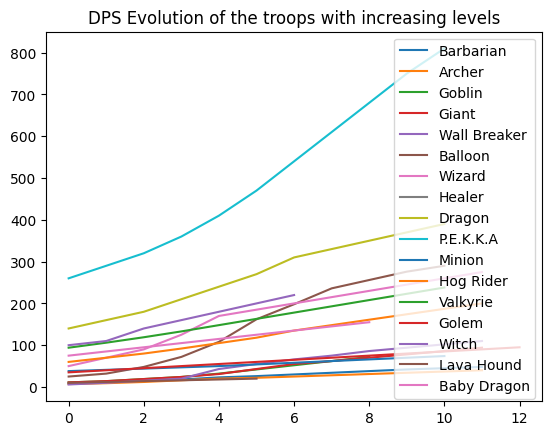

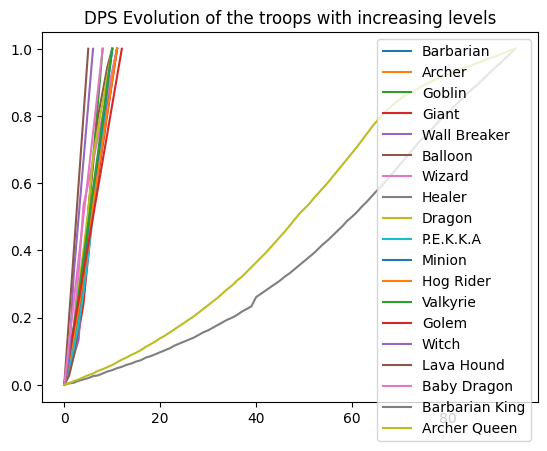

In [23]:
def normalize_dps(dps):
    if(len(dps) == 0):
        return []
    return (dps-np.min(dps))/(np.max(dps)-np.min(dps))



def plot_dps(normilized_dps=False, heros=False):
    for row in df.iterrows():
        if row[1]['name'] != 'Barbarian King' and row[1]['name'] != 'Archer Queen':
            if normilized_dps:
                plt.plot(normalize_dps(row[1]['dps']), label = row[1]['name'])
            else:
                plt.plot(row[1]['dps'], label = row[1]['name'])
        else:
            if heros:
                if normilized_dps:
                    plt.plot(normalize_dps(row[1]['dps']), label = row[1]['name'])
                else:
                    plt.plot(row[1]['dps'], label = row[1]['name'])
        
    plt.legend() 
    plt.title('DPS Evolution of the troops with increasing levels')
    plt.show()
    
plot_dps(normilized_dps=False, heros=False)
plot_dps(normilized_dps=True, heros=True)

## Research Question 1 <br>
Jerry wants to know which troop is the best in the game statwise compared to the
housing spaces to focus his resources on this troop (the healer will be an outlier). <br>
<br>
Assume troops are maxed out at TownHall 9, compute the following ratios:
dps/housing, hp/housing, speed/housing. See the ranks of each troop in each of the three categories, then sum all three ranks and plot to see which troop is best overall.
Since speed is slightly important than HP or DPS (Damage Per Second), it will be weighted in the sum.

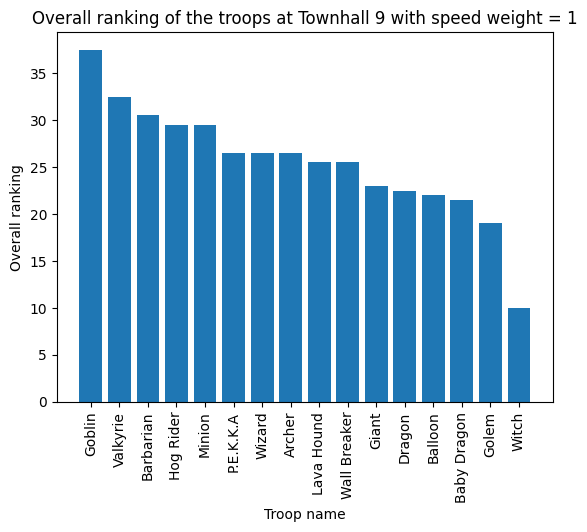

In [24]:
# Get dps/housing + speed/housing + hp/housing ratio for each troop at HDV 9:
names = df['name'].tolist()
for name in names:
    if name == 'Healer':
        del names[names.index(name)]

dps_ratio = []
speed_ratio = []
hp_ratio = []

for row in df.iterrows():
    if row[1]['name'] == 'Healer':
        continue

    housing_space = row[1]['housingSpace']

    speed = row[1]['speed']

    level = row[1]['levels'][8]
    dps_list = row[1]['dps']
    dps = dps_list[level]

    hp_list = row[1]['hitpoints']
    hp = hp_list[level]
    hp = float(str(hp).replace(',','')) # Conversion to 

    ratio = dps/housing_space
    ratio2 = speed
    ratio3 = hp/housing_space
    
    dps_ratio.append(ratio)
    speed_ratio.append(ratio2)
    hp_ratio.append(ratio3)

dps_ratio = dps_ratio[:-2] # Get rid Barbarian King and Archer Queen
names = names[:-2] # Get rid Barbarian King and Archer Queen
speed_ratio = speed_ratio[:-2] # Get rid Barbarian King and Archer Queen
hp_ratio = hp_ratio[:-2] # Get rid Barbarian King and Archer Queen

ratio_1 = pd.DataFrame({'name': names, 'dps_ratio': dps_ratio}) 
# plt.bar(ratio_1['name'], ratio_1['dps_ratio'])
# plt.xticks(rotation=90)
# plt.xlabel('Troop name')
# plt.ylabel('DPS/Housing ratio')
# plt.show()
ratio_1 = ratio_1.sort_values(by='dps_ratio', ascending=True)


ratio_2 = pd.DataFrame({'name': names, 'speed_ratio': speed_ratio})
# plt.bar(ratio_2['name'], ratio_2['speed_ratio'])
# plt.xticks(rotation=90)
# plt.xlabel('Troop name')
# plt.ylabel('Speed/Housing ratio')
# plt.show()
ratio_2 = ratio_2.sort_values(by='speed_ratio', ascending=True)

ratio_3 = pd.DataFrame({'name': names, 'hp_ratio': hp_ratio})
# plt.bar(ratio_3['name'], ratio_3['hp_ratio'])
# plt.xticks(rotation=90)
# plt.xlabel('Troop name')
# plt.ylabel('HP/Housing ratio')
# plt.show()
ratio_3 = ratio_3.sort_values(by='hp_ratio', ascending=True)

speed_weight = 1 # Weight of the speed in the final rank

overall_ranking = pd.DataFrame({'name': names, 'dps_rank': ratio_1['dps_ratio'].rank(), 'speed_rank': ratio_2['speed_ratio'].rank() * speed_weight, 'hp_rank': ratio_3['hp_ratio'].rank(), 'overall_rank': ratio_1['dps_ratio'].rank() + ratio_2['speed_ratio'].rank() * speed_weight + ratio_3['hp_ratio'].rank()})
overall_ranking = overall_ranking.sort_values(by='overall_rank', ascending=True).reset_index()
overall_ranking.drop('index', axis=1, inplace=True) # Drop the index column
overall_ranking_reversed = overall_ranking[::-1]

# Plot
# Make sure speed weight = 1, 0.2 or 0
plt.bar(overall_ranking_reversed['name'], overall_ranking_reversed['overall_rank'])
plt.xticks(rotation=90)
plt.xlabel('Troop name')
plt.ylabel('Overall ranking')
plt.title('Overall ranking of the troops at Townhall 9 with speed weight = 1')
plt.show()

**NB: Research Question number 2 is in the other folder: defence_structure_analysis**

# Research Question 3 <br>

Finally Jerry wants to know which hero is most powerful again to focus on improving this hero first before others (Townhall 9 has the Archer Queen and the Barbarian King). <br>
<br>
A comparison is conducted between the increase of a hero's attack (DPS) as he/she gains levels and the increase of a hero's HP as he/she gains levels.

In [25]:
# Modified code to load data for heroes
import pandas as pd
import os

def get_troop_data(path):
    df = pd.read_json(path)
    return df.drop(df.columns[0], axis=1)

df = pd.DataFrame({"Heros": ["Archer Queen","Barbarian King"]})

# Create an empty DataFrame to store the concatenated data
df_heros = pd.DataFrame()

for row in df.iterrows():
    file_name = row[1].iloc[0].replace(" ", "_") + ".csv"
    if os.path.exists(file_name):  # Check if the file exists
        df_temp = pd.read_csv(file_name)
        df_temp.insert(0, 'Hero', row[1].iloc[0])  # Add a new column with the Defence type
        # Grouping multiple values with the same Defence name into a list
        df_grouped = df_temp.groupby('Hero').agg(lambda x: x.tolist()).reset_index()
        df_heros = pd.concat([df_heros, df_grouped], ignore_index=True)
# Now, you have all the data concatenated in the 'concatenated_df' DataFrame with multiple values grouped into a list

# Convert strings to integers
df_heros['Hitpoints'] = df_heros['Hitpoints'].apply(lambda x: [int(i.replace(',', '')) for i in x])
df_heros

,Hero,Level,Damage per Second,Damage per Attack,Hitpoints,Research cost,Research time,Laboratory Level Required
0,Archer Queen,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[136, 139, 143, 146, 150, 154, 157, 162, 165, ...","[102.0, 104.25, 107.25, 109.5, 112.5, 115.5, 1...","[580, 592, 604, 617, 630, 643, 657, 670, 685, ...","[10,000, 10,000, 11,000, 12,000, 13,000, 14,00...","[nan, 4h, 6h, 8h, 10h, 12h, 14h, 16h, 18h, 20h...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
1,Barbarian King,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[102, 104, 105, 108, 110, 112, 115, 116, 119, ...","[122.4, 124.8, 126.0, 129.6, 132.0, 134.4, 138...","[1445, 1481, 1518, 1556, 1595, 1635, 1675, 171...","[5,000, 5,000, 6,000, 7,000, 8,000, 9,000, 10,...","[nan, 4h, 6h, 8h, 10h, 12h, 14h, 16h, 18h, 20h...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, ..."


Archer Queen coefficient: [[7.75422732]]
Barbarian King coefficient: [[5.63149496]]


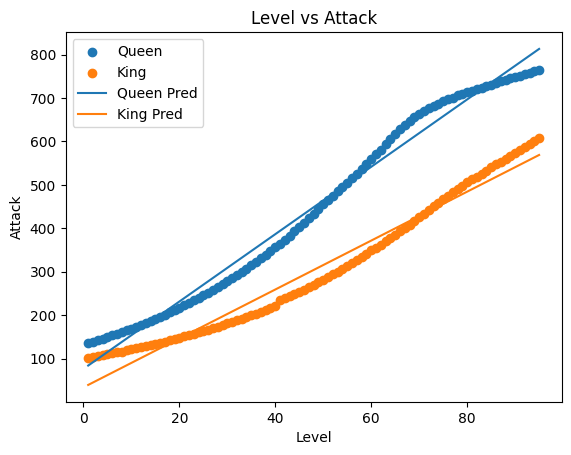

In [26]:
# Attack (DPS) growth with level increase of heroes
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
# Flatten the arrays
level_values = np.array(df_heros.loc[0,'Level']).reshape(-1, 1)
attack_values_Queen = np.array(df_heros.loc[0,'Damage per Second']).reshape(-1, 1)
attack_values_King = np.array(df_heros.loc[1,'Damage per Second']).reshape(-1, 1)

attack_queen_model = LinearRegression().fit(level_values, attack_values_Queen)
attack_queen_regression = attack_queen_model.predict(level_values)
print("Archer Queen coefficient:", attack_queen_model.coef_)

attack_king_model = LinearRegression().fit(level_values, attack_values_King)
attack_king_regression = attack_king_model.predict(level_values)
print("Barbarian King coefficient:", attack_king_model.coef_)

# Plot
plt.scatter(level_values, attack_values_Queen, label="Queen")
plt.scatter(level_values, attack_values_King, label="King")
plt.plot(level_values, attack_queen_regression, label="Queen Pred")
plt.plot(level_values, attack_king_regression, label="King Pred")
# plt.savefig('heros_attack.png')
# Add legend
plt.legend()
plt.xlabel('Level')
plt.ylabel('Attack')
plt.title('Level vs Attack')
plt.show()

Archer Queen coefficient: [[31.11965286]]
Barbarian King coefficient: [112.73027716]


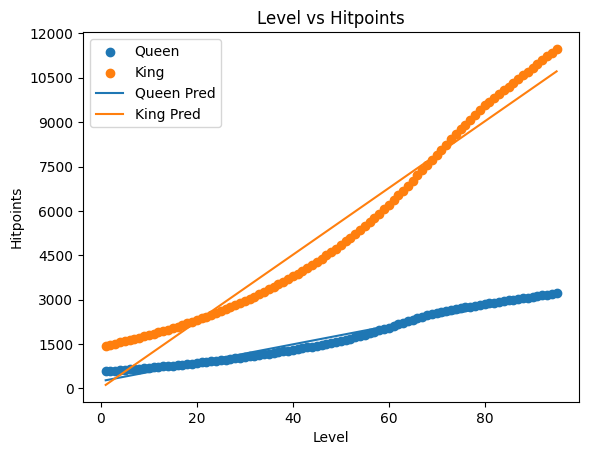

In [27]:
# Health growth with level increase of heroes
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
# Flatten the arrays
level_values = np.array(df_heros.loc[0,'Level']).reshape(-1, 1)

hp_values_Queen = np.array(df_heros.loc[0,'Hitpoints']).reshape(-1, 1)
hp_queen_model = LinearRegression().fit(level_values, hp_values_Queen)
hp_queen_regression = hp_queen_model.predict(level_values)
print("Archer Queen coefficient:", hp_queen_model.coef_)

hp_values_King = df_heros.loc[1,'Hitpoints']
hp_king_model = LinearRegression().fit(level_values, hp_values_King)
hp_king_regression = hp_king_model.predict(level_values)
print("Barbarian King coefficient:", hp_king_model.coef_)

# Plot
plt.scatter(level_values, hp_values_Queen, label='Queen')
plt.scatter(level_values, hp_values_King, label='King')
plt.plot(level_values, hp_queen_regression, label='Queen Pred')
plt.plot(level_values, hp_king_regression, label='King Pred')
plt.legend()
plt.xlabel('Level')
plt.ylabel('Hitpoints')
plt.title('Level vs Hitpoints')

# Set the number of y-axis ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
# plt.savefig('heros_hp.png')

plt.show()